# Task 1 - Prediction using Supervised ML

## Graduate Rotational Internship Program (GRIP) The Spark Foundation

## Data Science and Business Analytics Internship

### Author: Vadala Sainath Reddy

The purpose is to predict the percentage of student scores based on the study hours.

## Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Matplotlib is building the font cache; this may take a moment.


In [28]:
#load dataset
df= pd.read_csv("student_scores.csv")
df.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

## Preliminary Analysis

In [29]:
df.shape

(25, 2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [32]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

## Visualizing

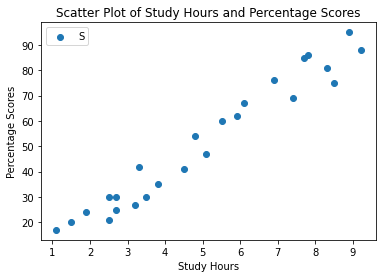

In [33]:
plt.scatter(x=df["Hours"], y=df["Scores"])
plt.xlabel("Study Hours")
plt.ylabel("Percentage Scores")
plt.title("Scatter Plot of Study Hours and Percentage Scores")
plt.legend("S")

The scatter plot show the positive linear relation (linearly dependent) between students' study hours and percentages scores.

Text(0.5, 1.0, 'Distribution of Study Hours')

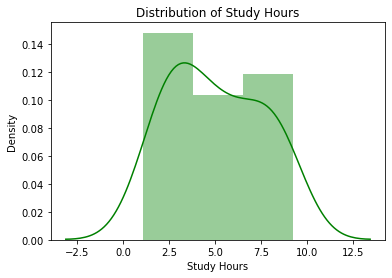

In [34]:
sns.distplot(df["Hours"], color="green") 
plt.xlabel("Study Hours")
plt.ylabel("Density")
plt.title("Distribution of Study Hours")

Text(0.5, 1.0, 'Distribution of Percentage Scores')

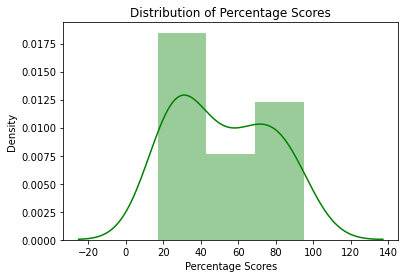

In [35]:
sns.distplot(df["Scores"], color="green")
plt.xlabel("Percentage Scores")
plt.ylabel("Density")
plt.title("Distribution of Percentage Scores")

## Preparing Data

In [36]:
X= df.iloc[:,:-1].values #input or attributes
y= df.iloc[:,1].values #output or labels

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The shapes of data:

In [38]:
X_train.shape

(20, 1)

In [39]:
X_test.shape

(5, 1)

In [40]:
y_train.shape

(20,)

In [41]:
y_test.shape

(5,)

## Prediction and Modelling using Linear Regression

In [42]:
print("Linear Regression Succesfully Built:")
reg = LinearRegression() 
reg.fit(X_train, y_train)

Linear Regression Succesfully Built:


LinearRegression()

In [43]:
print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(reg.score(X_test, y_test)))

Accuracy on training set: 0.952
Accuracy on test set: 0.945


In [44]:
print ("Coefficient :", reg.coef_)
print ("Intercept :", reg.intercept_)

Coefficient : [9.91065648]
Intercept : 2.018160041434683


In [45]:
#The linear regression
line = reg.coef_*X + reg.intercept_

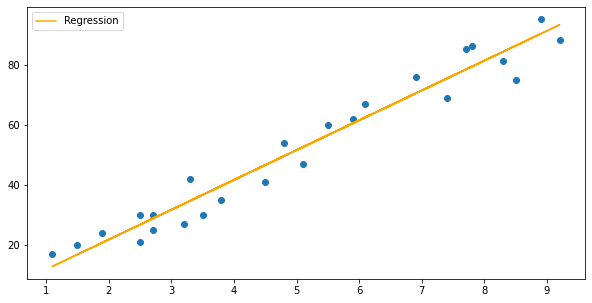

In [46]:
#Visualize the data with regression line
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.scatter(X,y)
plt.plot(X, line, color="orange", label="Regression")
plt.legend()

In [47]:
#prediction
y_pred = reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [48]:
#mean square error
mean_squared_error(y_pred, y_test)

21.5987693072174

In [49]:
#R-squared
r2_score(y_test, y_pred)

0.9454906892105356

<b> R-quared showed 0.9454 which means the approximately 94.54% of the observed variation can be explained by the model's input. </b>

In [50]:
# Actual data and predicted value
data = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
data

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [51]:
# Test the prediction
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict(test)
print("Number of hours: {}".format(hours))
print("Predicted score: {:.2f}".format(own_pred[0]))

Number of hours: 9.25
Predicted score: 93.69


### Thank You